In [488]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import os
import numpy as np

In [489]:
df = pd.read_csv('FINAL_MASTER.csv')
print("Shape of the loaded Data:", df.shape)

Shape of the loaded Data: (37035, 7)


In [490]:
df.isnull().sum()

DayOfYear    0
Hour         0
foF2         0
Longitude    0
Latitude     0
F10.7        0
Station      0
dtype: int64

In [491]:
df.head()

,DayOfYear,Hour,foF2,Longitude,Latitude,F10.7,Station
0,1,0,5.90,315.0,-22.7,69.5,CP
1,1,1,5.15,315.0,-22.7,69.5,CP
2,1,2,4.45,315.0,-22.7,69.5,CP
3,1,3,4.90,315.0,-22.7,69.5,CP
4,1,4,3.85,315.0,-22.7,69.5,CP


In [492]:
x = df.drop(['foF2', 'Station'],axis=1)
x.head()

,DayOfYear,Hour,Longitude,Latitude,F10.7
0,1,0,315.0,-22.7,69.5
1,1,1,315.0,-22.7,69.5
2,1,2,315.0,-22.7,69.5
3,1,3,315.0,-22.7,69.5
4,1,4,315.0,-22.7,69.5


In [493]:
y = df['foF2']
y.head()

0    5.90
1    5.15
2    4.45
3    4.90
4    3.85
Name: foF2, dtype: float64

In [494]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [495]:
model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("reg", LinearRegression())   
])

model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [496]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 1.9283282453320598
R²: 0.4401016021906571


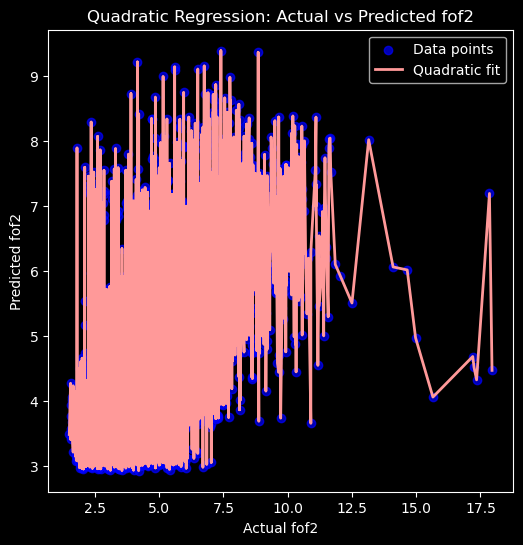

In [497]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten to ensure 1D arrays
y_test_array = np.array(y_test).reshape(-1)
y_pred_array = np.array(y_pred).reshape(-1)

# Sort by actual values for a smooth curve
sorted_idx = np.argsort(y_test_array)
y_test_sorted = y_test_array[sorted_idx]
y_pred_sorted = y_pred_array[sorted_idx]

plt.figure(figsize=(6,6))
plt.scatter(y_test_array, y_pred_array, color='blue', alpha=0.7, label="Data points") 
plt.plot(y_test_sorted, y_pred_sorted, color='#ff9999', linewidth=2, label="Quadratic fit") 
plt.xlabel("Actual fof2")
plt.ylabel("Predicted fof2")
plt.title("Quadratic Regression: Actual vs Predicted fof2")
plt.legend()
plt.show()


In [498]:
# Saving the model
joblib.dump(model,'fof2_qua_model.pkl')

['fof2_qua_model.pkl']

In [499]:
qua_model = joblib.load(r"C:\Users\Amna\fof2_qua_model.pkl")

## On all regions


Region: CP_2019_merged
MSE: 4.0822
R² Score: 0.3692


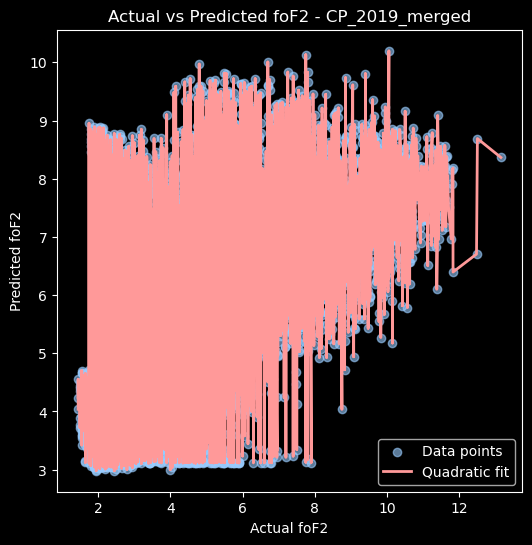


Region: ElginAB_2019_merged
MSE: 0.8510
R² Score: 0.3353


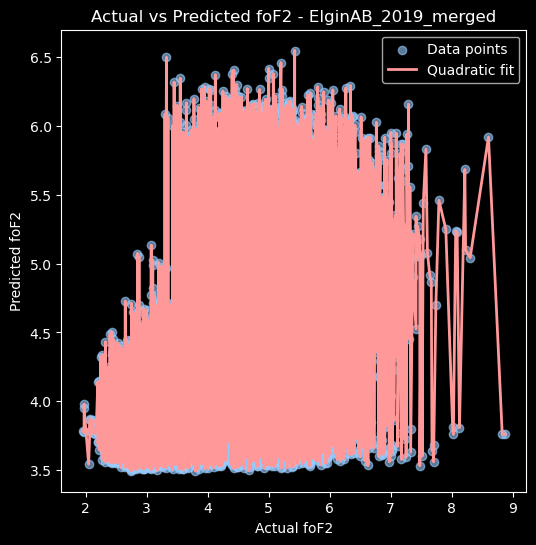


Region: Jicamarca_2019_merged
MSE: 2.3349
R² Score: 0.0949


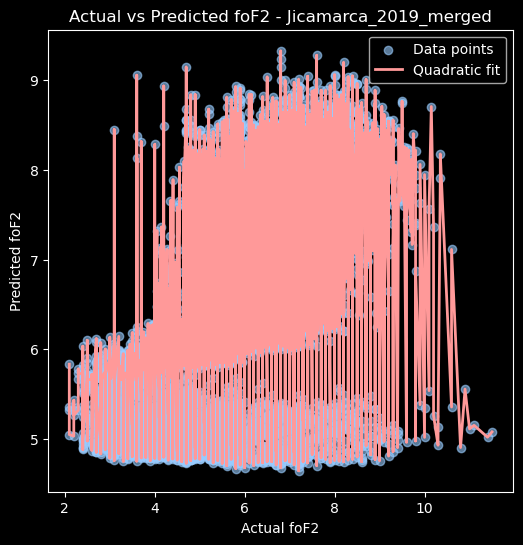


Region: MilstonHill_2019_merged
MSE: 1.0227
R² Score: 0.2189


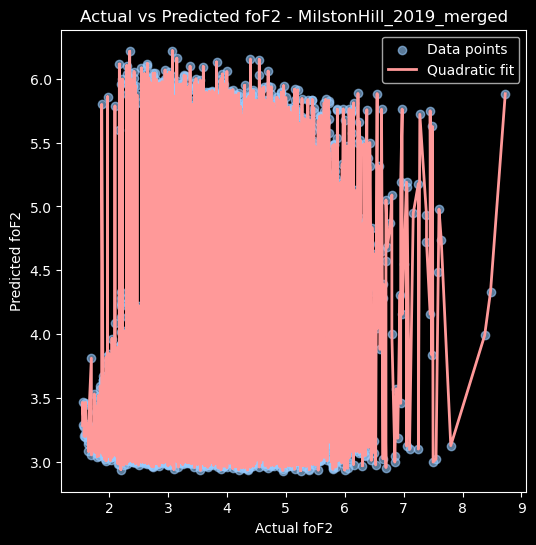


Region: Ramey_2019_merged
MSE: 2.4738
R² Score: 0.3372


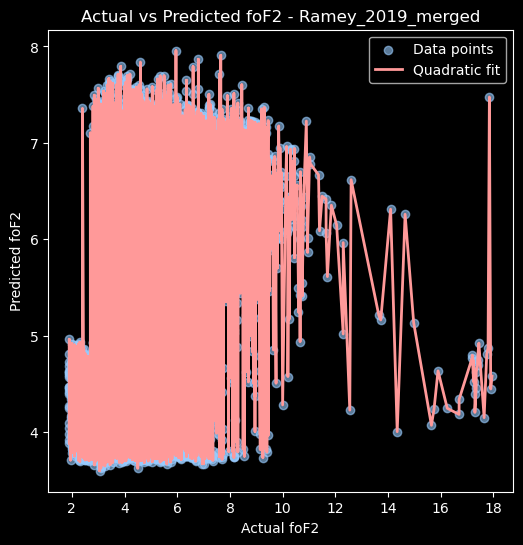

In [501]:
# Folder with merged regional CSVs
merged_folder = r"C:\Users\Amna\Regional_Dataset_F107"

# Features used in the model
features = ['DayOfYear','Hour','Longitude', 'Latitude', 'F10.7']

# Loop over each regional CSV
for csv_file in os.listdir(merged_folder):
    if csv_file.endswith(".csv"):
        region_name = os.path.splitext(csv_file)[0]
        csv_path = os.path.join(merged_folder, csv_file)

        df = pd.read_csv(csv_path)

        X = df[features]
        y_actual = df['foF2']

        y_pred = qua_model.predict(X)

        mse = mean_squared_error(y_actual, y_pred)
        r2 = r2_score(y_actual, y_pred)
        print(f"\nRegion: {region_name}")
        print(f"MSE: {mse:.4f}")
        print(f"R² Score: {r2:.4f}")
        
        # Flatten to 1D arrays
        y_actual_array = np.array(y_actual).reshape(-1)
        y_pred_array = np.array(y_pred).reshape(-1)
        
        # Sort actual values for smooth curve
        sorted_idx = np.argsort(y_actual_array)
        y_actual_sorted = y_actual_array[sorted_idx]
        y_pred_sorted = y_pred_array[sorted_idx]
        
        plt.figure(figsize=(6,6))
        plt.scatter(y_actual_array, y_pred_array, color='#99ccff', alpha=0.6, label="Data points")  # pastel blue points
        plt.plot(y_actual_sorted, y_pred_sorted, color='#ff9999', linewidth=2, label="Quadratic fit")  # pastel red curve
        plt.xlabel("Actual foF2")
        plt.ylabel("Predicted foF2")
        plt.title(f"Actual vs Predicted foF2 - {region_name}")
        plt.legend()
        plt.show()

     



Region: CP_2019_merged
MSE: 3.2942
R² Score: 0.4673


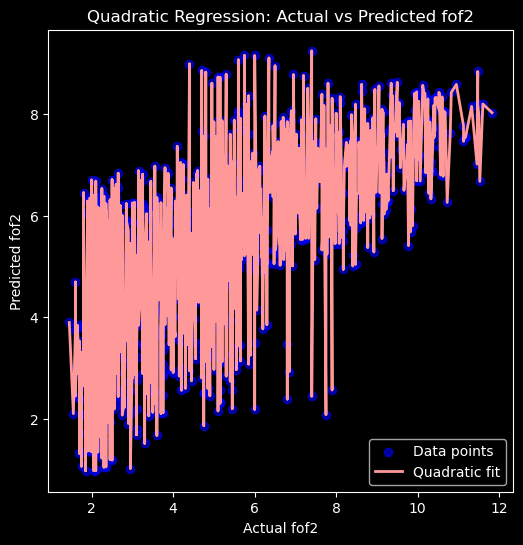


Region: ElginAB_2019_merged
MSE: 0.8061
R² Score: 0.3570


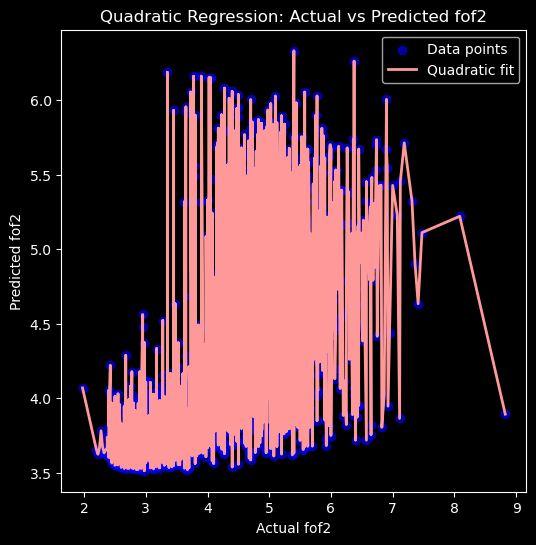


Region: Jicamarca_2019_merged
MSE: 1.6241
R² Score: 0.3728


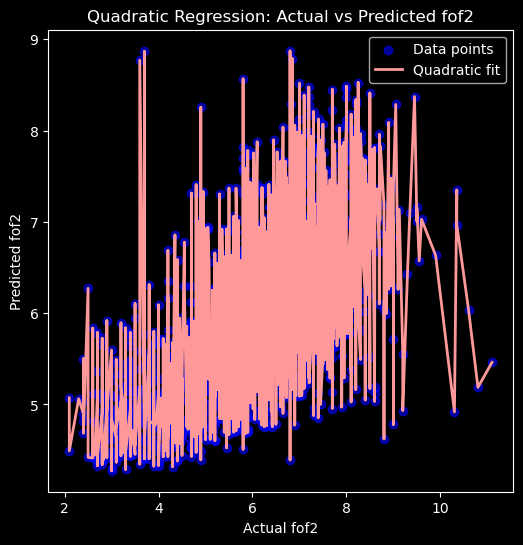


Region: MilstonHill_2019_merged
MSE: 0.8560
R² Score: 0.3090


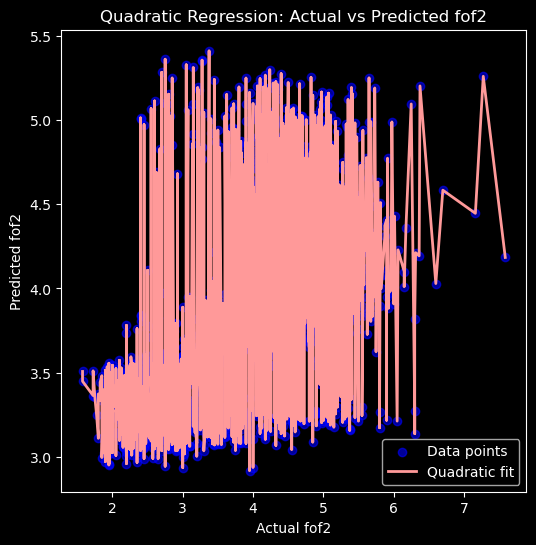


Region: Ramey_2019_merged
MSE: 2.3520
R² Score: 0.3813


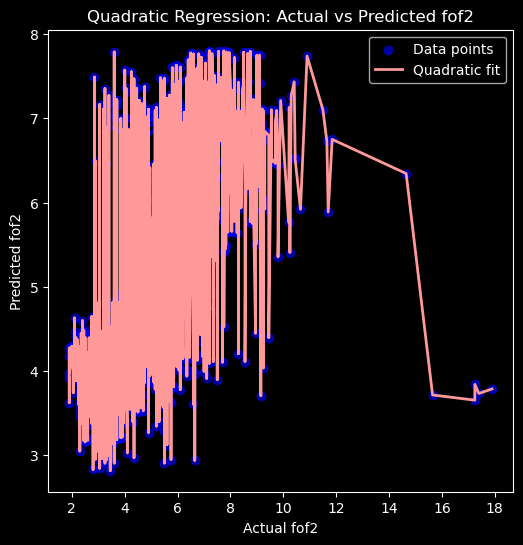

In [502]:
for csv_file in os.listdir(merged_folder):
    if csv_file.endswith(".csv"):
        region_name = os.path.splitext(csv_file)[0]
        csv_path = os.path.join(merged_folder, csv_file)
                                
        df = pd.read_csv(csv_path)

        X = df[['DayOfYear','Hour','F10.7']]  # Drop Latitude and Longitude
        y = df['foF2']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"\nRegion: {region_name}")
        print(f"MSE: {mse:.4f}")
        print(f"R² Score: {r2:.4f}")

        # Flatten to ensure 1D arrays
        y_test_array = np.array(y_test).reshape(-1)
        y_pred_array = np.array(y_pred).reshape(-1)
        
        # Sort by actual values for a smooth curve
        sorted_idx = np.argsort(y_test_array)
        y_test_sorted = y_test_array[sorted_idx]
        y_pred_sorted = y_pred_array[sorted_idx]
        
        plt.figure(figsize=(6,6))
        plt.scatter(y_test_array, y_pred_array, color='blue', alpha=0.6, label="Data points")
        plt.plot(y_test_sorted, y_pred_sorted, color='#ff9999', linewidth=2, label="Quadratic fit")
        plt.xlabel("Actual fof2")
        plt.ylabel("Predicted fof2")
        plt.title("Quadratic Regression: Actual vs Predicted fof2")
        plt.legend()
        plt.show()

    